In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

# 데이터 읽기

In [36]:
df_ALL = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
df_ALL.head()

mod_d          ID    ID_fam    year  region  town_t  apt_t   psu  \
0  2018.02.01.  A651172801  A6511728  2016.0     1.0     1.0    2.0  A651   
1  2018.02.01.  A651172802  A6511728  2016.0     1.0     1.0    2.0  A651   
2  2018.02.01.  A651183001  A6511830  2016.0     1.0     1.0    2.0  A651   
3  2018.02.01.  A651183002  A6511830  2016.0     1.0     1.0    2.0  A651   
4  2018.02.01.  A651183003  A6511830  2016.0     1.0     1.0    2.0  A651   

   sex   age   ...       N_VA_RAE      N_CAROT    N_RETIN      N_B1      N_B2  \
0  1.0  61.0   ...      68.125541   817.506495   0.000000  1.812120  1.599025   
1  2.0  57.0   ...      91.302698  1095.561039   0.005945  1.075103  0.756771   
2  2.0  41.0   ...     261.852637  2147.567940  82.888642  1.093273  0.939505   
3  1.0  39.0   ...            NaN          NaN        NaN       NaN       NaN   
4  2.0  38.0   ...            NaN          NaN        NaN       NaN       NaN   

      N_NIAC      N_VITC  LF_secur_y  LF_BUYER  LF_SAFE  
0  17.241284  417.773500         1.0       1.0      1.0  
1   5.302599   31.845311         1.0       1.0      1.0  
2  16.655787   29.051934         1.0       2.0      2.0  
3        NaN         NaN         NaN       NaN      NaN  
4        NaN         NaN         NaN       NaN      NaN  

[5 rows x 768 columns]

In [37]:
df_ffq = pd.read_sas("./hn16_ffq.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
df_ffq.head()

mod_d          ID    ID_fam    year  region  town_t  apt_t   psu  \
0  2018.05.31.  A651172801  A6511728  2016.0     1.0     1.0    2.0  A651   
1  2018.05.31.  A651172802  A6511728  2016.0     1.0     1.0    2.0  A651   
2  2018.05.31.  A651183001  A6511830  2016.0     1.0     1.0    2.0  A651   
3  2018.05.31.  A651183002  A6511830  2016.0     1.0     1.0    2.0  A651   
4  2018.05.31.  A651183003  A6511830  2016.0     1.0     1.0    2.0  A651   

   sex   age    ...          FQ_FE        FQ_NA         FQ_K       FQ_VA  \
0  1.0  61.0    ...            NaN          NaN          NaN         NaN   
1  2.0  57.0    ...            NaN          NaN          NaN         NaN   
2  2.0  41.0    ...      12.879218  3671.647791  2226.426572  459.311661   
3  1.0  39.0    ...            NaN          NaN          NaN         NaN   
4  2.0  38.0    ...            NaN          NaN          NaN         NaN   

    FQ_RETIN     FQ_CAROT     FQ_B1    FQ_B2    FQ_NIAC    FQ_VITC  
0        NaN          NaN       NaN      NaN        NaN        NaN  
1        NaN          NaN       NaN      NaN        NaN        NaN  
2  84.990392  2158.129699  1.628015  1.13383  13.896055  79.150355  
3        NaN          NaN       NaN      NaN        NaN        NaN  
4        NaN          NaN       NaN      NaN        NaN        NaN  

[5 rows x 434 columns]

In [38]:
df = pd.merge(df_ALL, df_ffq, how='left', on=[
                                  'mod_d', # 최종DB 수정일
                                  'ID', # 개인 아이디
                                  'ID_fam', # 가구 아이디
                                  'year', # 조사연도
                                  'region', # 17개 시도
                                  'town_t', # 동/읍면 구분
                                  'apt_t', # 아파트 구분, 1.일반, 2.아파트
                                  'psu', # 조사구번호
                                  'sex', # 성별, 1.남자, 2.여자
                                  'age', # 만나이, 80은 80이상 포함(탑코딩)
                                  'age_month', # 만 1~6세의 경우 개월수(월령)
                                  'incm', # 소득 사분위수(개인), 1.하, 2.중하, 3.중상, 4.상
                                  'ho_incm', # 소득 사분위수(가구),  1.하, 2.중하, 3.중상, 4.상
                                  'edu', # 교육수준 재분류 코드, 1.초졸이하, 2.중졸, 3.고졸, 4.대졸이상
                                  'occp', # 직업재분류 및 실업/비경제활동 상태코드
                                  'wt_hs', # 가구조사 가중치
                                  'wt_itvex', # 건강설문-검진조사 가중치
                                  'wt_pft', # 폐기능검사 가중치(만40세이상)
                                  'wt_hm', # 중금속검사 가중치(만10세이상)
                                  'wt_ntr', # 영양조사 가중치
                                  'wt_tot', # 건강설문-검진조사 & 영양조사 가중치
                                  'wt_pfhm', # 폐기능검사 & 중금속검사 가중치(만40세이상)
                                  'wt_pfnt', # 폐기능검사 & 영양조사 가중치(만40세이상)
                                  'wt_hmnt', # 중금속검사 & 영양조사 가중치(만10세이상)
                                  'wt_pfhmnt', # 폐기능검사 & 중금속검사 & 영양조사 가중치(만40세이상)
                                  'kstrata' # 분산추정 층
                                 ])
df

mod_d          ID    ID_fam    year  region  town_t  apt_t   psu  \
0     2018.02.01.  A651172801  A6511728  2016.0     1.0     1.0    2.0  A651   
1     2018.02.01.  A651172802  A6511728  2016.0     1.0     1.0    2.0  A651   
2     2018.02.01.  A651183001  A6511830  2016.0     1.0     1.0    2.0  A651   
3     2018.02.01.  A651183002  A6511830  2016.0     1.0     1.0    2.0  A651   
4     2018.02.01.  A651183003  A6511830  2016.0     1.0     1.0    2.0  A651   
5     2018.02.01.  A651183004  A6511830  2016.0     1.0     1.0    2.0  A651   
6     2018.02.01.  A651183005  A6511830  2016.0     1.0     1.0    2.0  A651   
7     2018.02.01.  A651194902  A6511949  2016.0     1.0     1.0    2.0  A651   
8     2018.02.01.  A651205101  A6512051  2016.0     1.0     1.0    2.0  A651   
9     2018.02.01.  A651205102  A6512051  2016.0     1.0     1.0    2.0  A651   
10    2018.02.01.  A651205103  A6512051  2016.0     1.0     1.0    2.0  A651   
11    2018.02.01.  A651205104  A6512051  2016.0     1.0     1.0    2.0  A651   
12    2018.02.01.  A651228902  A6512289  2016.0     1.0     1.0    2.0  A651   
13    2018.02.01.  A651235701  A6512357  2016.0     1.0     1.0    2.0  A651   
14    2018.02.01.  A651249301  A6512493  2016.0     1.0     1.0    2.0  A651   
15    2018.02.01.  A651249302  A6512493  2016.0     1.0     1.0    2.0  A651   
16    2018.02.01.  A651249303  A6512493  2016.0     1.0     1.0    2.0  A651   
17    2018.02.01.  A651261202  A6512612  2016.0     1.0     1.0    2.0  A651   
18    2018.02.01.  A651268001  A6512680  2016.0     1.0     1.0    2.0  A651   
19    2018.02.01.  A651268002  A6512680  2016.0     1.0     1.0    2.0  A651   
20    2018.02.01.  A651268003  A6512680  2016.0     1.0     1.0    2.0  A651   
21    2018.02.01.  A651268004  A6512680  2016.0     1.0     1.0    2.0  A651   
22    2018.02.01.  A651281601  A6512816  2016.0     1.0     1.0    2.0  A651   
23    2018.02.01.  A651293501  A6512935  2016.0     1.0     1.0    2.0  A651   
24    2018.02.01.  A651293502  A6512935  2016.0     1.0     1.0    2.0  A651   
25    2018.02.01.  A651293503  A6512935  2016.0     1.0     1.0    2.0  A651   
26    2018.02.01.  A651302001  A6513020  2016.0     1.0     1.0    2.0  A651   
27    2018.02.01.  A651302002  A6513020  2016.0     1.0     1.0    2.0  A651   
28    2018.02.01.  A651302004  A6513020  2016.0     1.0     1.0    2.0  A651   
29    2018.02.01.  A651302005  A6513020  2016.0     1.0     1.0    2.0  A651   
...           ...         ...       ...     ...     ...     ...    ...   ...   
8120  2018.02.01.  R654271402  R6542714  2016.0     8.0     2.0    2.0  R654   
8121  2018.02.01.  R654271404  R6542714  2016.0     8.0     2.0    2.0  R654   
8122  2018.02.01.  R654271405  R6542714  2016.0     8.0     2.0    2.0  R654   
8123  2018.02.01.  R654271406  R6542714  2016.0     8.0     2.0    2.0  R654   
8124  2018.02.01.  R654279901  R6542799  2016.0     8.0     2.0    2.0  R654   
8125  2018.02.01.  R654288401  R6542884  2016.0     8.0     2.0    2.0  R654   
8126  2018.02.01.  R654288402  R6542884  2016.0     8.0     2.0    2.0  R654   
8127  2018.02.01.  R654288403  R6542884  2016.0     8.0     2.0    2.0  R654   
8128  2018.02.01.  R654288404  R6542884  2016.0     8.0     2.0    2.0  R654   
8129  2018.02.01.  R654296902  R6542969  2016.0     8.0     2.0    2.0  R654   
8130  2018.02.01.  R654296903  R6542969  2016.0     8.0     2.0    2.0  R654   
8131  2018.02.01.  R654308801  R6543088  2016.0     8.0     2.0    2.0  R654   
8132  2018.02.01.  R654308802  R6543088  2016.0     8.0     2.0    2.0  R654   
8133  2018.02.01.  R654308803  R6543088  2016.0     8.0     2.0    2.0  R654   
8134  2018.02.01.  R654315601  R6543156  2016.0     8.0     2.0    2.0  R654   
8135  2018.02.01.  R654315602  R6543156  2016.0     8.0     2.0    2.0  R654   
8136  2018.02.01.  R654315603  R6543156  2016.0     8.0     2.0    2.0  R654   
8137  2018.02.01.  R654315604  R6543156  2016.0     8.0     2.0    2.0  R654   
8138  2018.0

# 데이터 필터링
 - 18 < age <= 65
     - (4750, 1176)
 - DL1_pt : 혈압 치료 여부
     - (4709, 1176)

# 나이 필터링

In [39]:
#df_data = df.loc[18 < df.age,:].loc[df.age < 65, :].loc[df.DL1_pt != 1.0, :]
#df_data = df.loc[(18 < df.age) & (df.age < 65), :]
df_data = df.loc[(18 < df.age), :]
print(df_data.shape)
df_data

(6382, 1176)
Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :re

# 혈압 치료 여부 필터링

In [40]:
df_data = df_data.loc[(1 < df_data.DI1_pt) | (df_data.DI1_pt < 1), :]
print(df_data.shape)
df_data

(4727, 1176)


mod_d          ID    ID_fam    year  region  town_t  apt_t   psu  \
1     2018.02.01.  A651172802  A6511728  2016.0     1.0     1.0    2.0  A651   
2     2018.02.01.  A651183001  A6511830  2016.0     1.0     1.0    2.0  A651   
3     2018.02.01.  A651183002  A6511830  2016.0     1.0     1.0    2.0  A651   
4     2018.02.01.  A651183003  A6511830  2016.0     1.0     1.0    2.0  A651   
7     2018.02.01.  A651194902  A6511949  2016.0     1.0     1.0    2.0  A651   
8     2018.02.01.  A651205101  A6512051  2016.0     1.0     1.0    2.0  A651   
9     2018.02.01.  A651205102  A6512051  2016.0     1.0     1.0    2.0  A651   
14    2018.02.01.  A651249301  A6512493  2016.0     1.0     1.0    2.0  A651   
15    2018.02.01.  A651249302  A6512493  2016.0     1.0     1.0    2.0  A651   
17    2018.02.01.  A651261202  A6512612  2016.0     1.0     1.0    2.0  A651   
18    2018.02.01.  A651268001  A6512680  2016.0     1.0     1.0    2.0  A651   
19    2018.02.01.  A651268002  A6512680  2016.0     1.0     1.0    2.0  A651   
22    2018.02.01.  A651281601  A6512816  2016.0     1.0     1.0    2.0  A651   
23    2018.02.01.  A651293501  A6512935  2016.0     1.0     1.0    2.0  A651   
24    2018.02.01.  A651293502  A6512935  2016.0     1.0     1.0    2.0  A651   
25    2018.02.01.  A651293503  A6512935  2016.0     1.0     1.0    2.0  A651   
26    2018.02.01.  A651302001  A6513020  2016.0     1.0     1.0    2.0  A651   
27    2018.02.01.  A651302002  A6513020  2016.0     1.0     1.0    2.0  A651   
30    2018.02.01.  A651319001  A6513190  2016.0     1.0     1.0    2.0  A651   
31    2018.02.01.  A651319002  A6513190  2016.0     1.0     1.0    2.0  A651   
32    2018.02.01.  A651324101  A6513241  2016.0     1.0     1.0    2.0  A651   
33    2018.02.01.  A651324102  A6513241  2016.0     1.0     1.0    2.0  A651   
36    2018.02.01.  A651354702  A6513547  2016.0     1.0     1.0    2.0  A651   
38    2018.02.01.  A651359801  A6513598  2016.0     1.0     1.0    2.0  A651   
39    2018.02.01.  A651359802  A6513598  2016.0     1.0     1.0    2.0  A651   
41    2018.02.01.  A651373401  A6513734  2016.0     1.0     1.0    2.0  A651   
43    2018.02.01.  A651373404  A6513734  2016.0     1.0     1.0    2.0  A651   
44    2018.02.01.  A651381901  A6513819  2016.0     1.0     1.0    2.0  A651   
45    2018.02.01.  A651381902  A6513819  2016.0     1.0     1.0    2.0  A651   
46    2018.02.01.  A651381903  A6513819  2016.0     1.0     1.0    2.0  A651   
...           ...         ...       ...     ...     ...     ...    ...   ...   
8091  2018.02.01.  R653364902  R6533649  2016.0     8.0     2.0    1.0  R653   
8092  2018.02.01.  R653364903  R6533649  2016.0     8.0     2.0    1.0  R653   
8094  2018.02.01.  R653398901  R6533989  2016.0     8.0     2.0    1.0  R653   
8097  2018.02.01.  R653417601  R6534176  2016.0     8.0     2.0    1.0  R653   
8102  2018.02.01.  R654181302  R6541813  2016.0     8.0     2.0    2.0  R654   
8105  2018.02.01.  R654198301  R6541983  2016.0     8.0     2.0    2.0  R654   
8106  2018.02.01.  R654198302  R6541983  2016.0     8.0     2.0    2.0  R654   
8108  2018.02.01.  R654206802  R6542068  2016.0     8.0     2.0    2.0  R654   
8109  2018.02.01.  R654215301  R6542153  2016.0     8.0     2.0    2.0  R654   
8110  2018.02.01.  R654215302  R6542153  2016.0     8.0     2.0    2.0  R654   
8114  2018.02.01.  R654244202  R6542442  2016.0     8.0     2.0    2.0  R654   
8115  2018.02.01.  R654261201  R6542612  2016.0     8.0     2.0    2.0  R654   
8116  2018.02.01.  R654261202  R6542612  2016.0     8.0     2.0    2.0  R654   
8120  2018.02.01.  R654271402  R6542714  2016.0     8.0     2.0    2.0  R654   
8124  2018.02.01.  R654279901  R6542799  2016.0     8.0     2.0    2.0  R654   
8125  2018.02.01.  R654288401  R6542884  2016.0     8.0     2.0    2.0  R654   
8126  2018.02.01.  R654288402  R6542884  2016.0     8.0     2.0    2.0  R654   
8129  2018.02.01.  R654296902  R6542969  2016.0     8.0     2.0    2.0  R654   
8131  2018.0

In [41]:
pd.value_counts(df_data.age.values, sort=False).sort_index()

19.0     61
20.0     47
21.0     64
22.0     61
23.0     64
24.0     79
25.0     61
26.0     74
27.0     72
28.0     62
29.0     56
30.0     68
31.0     77
32.0     95
33.0    111
34.0    119
35.0    116
36.0    119
37.0    129
38.0    128
39.0    111
40.0     82
41.0    108
42.0    117
43.0    105
44.0    111
45.0    129
46.0    112
47.0     99
48.0     95
       ... 
51.0     90
52.0     69
53.0     84
54.0     81
55.0     96
56.0     82
57.0     95
58.0     82
59.0     77
60.0     78
61.0     73
62.0     61
63.0     49
64.0     57
65.0     78
66.0     42
67.0     49
68.0     64
69.0     47
70.0     42
71.0     40
72.0     32
73.0     35
74.0     38
75.0     45
76.0     23
77.0     34
78.0     27
79.0     23
80.0    124
Length: 62, dtype: int64

In [42]:
#column_list = ['sex', 'age', 'age_month', 'incm', 'ho_incm', 'edu', 'occp','HE_sbp','HE_dbp']
column_list = ['sex', 'age', 'incm', 'ho_incm', 'edu', 'occp','HE_sbp','HE_dbp']

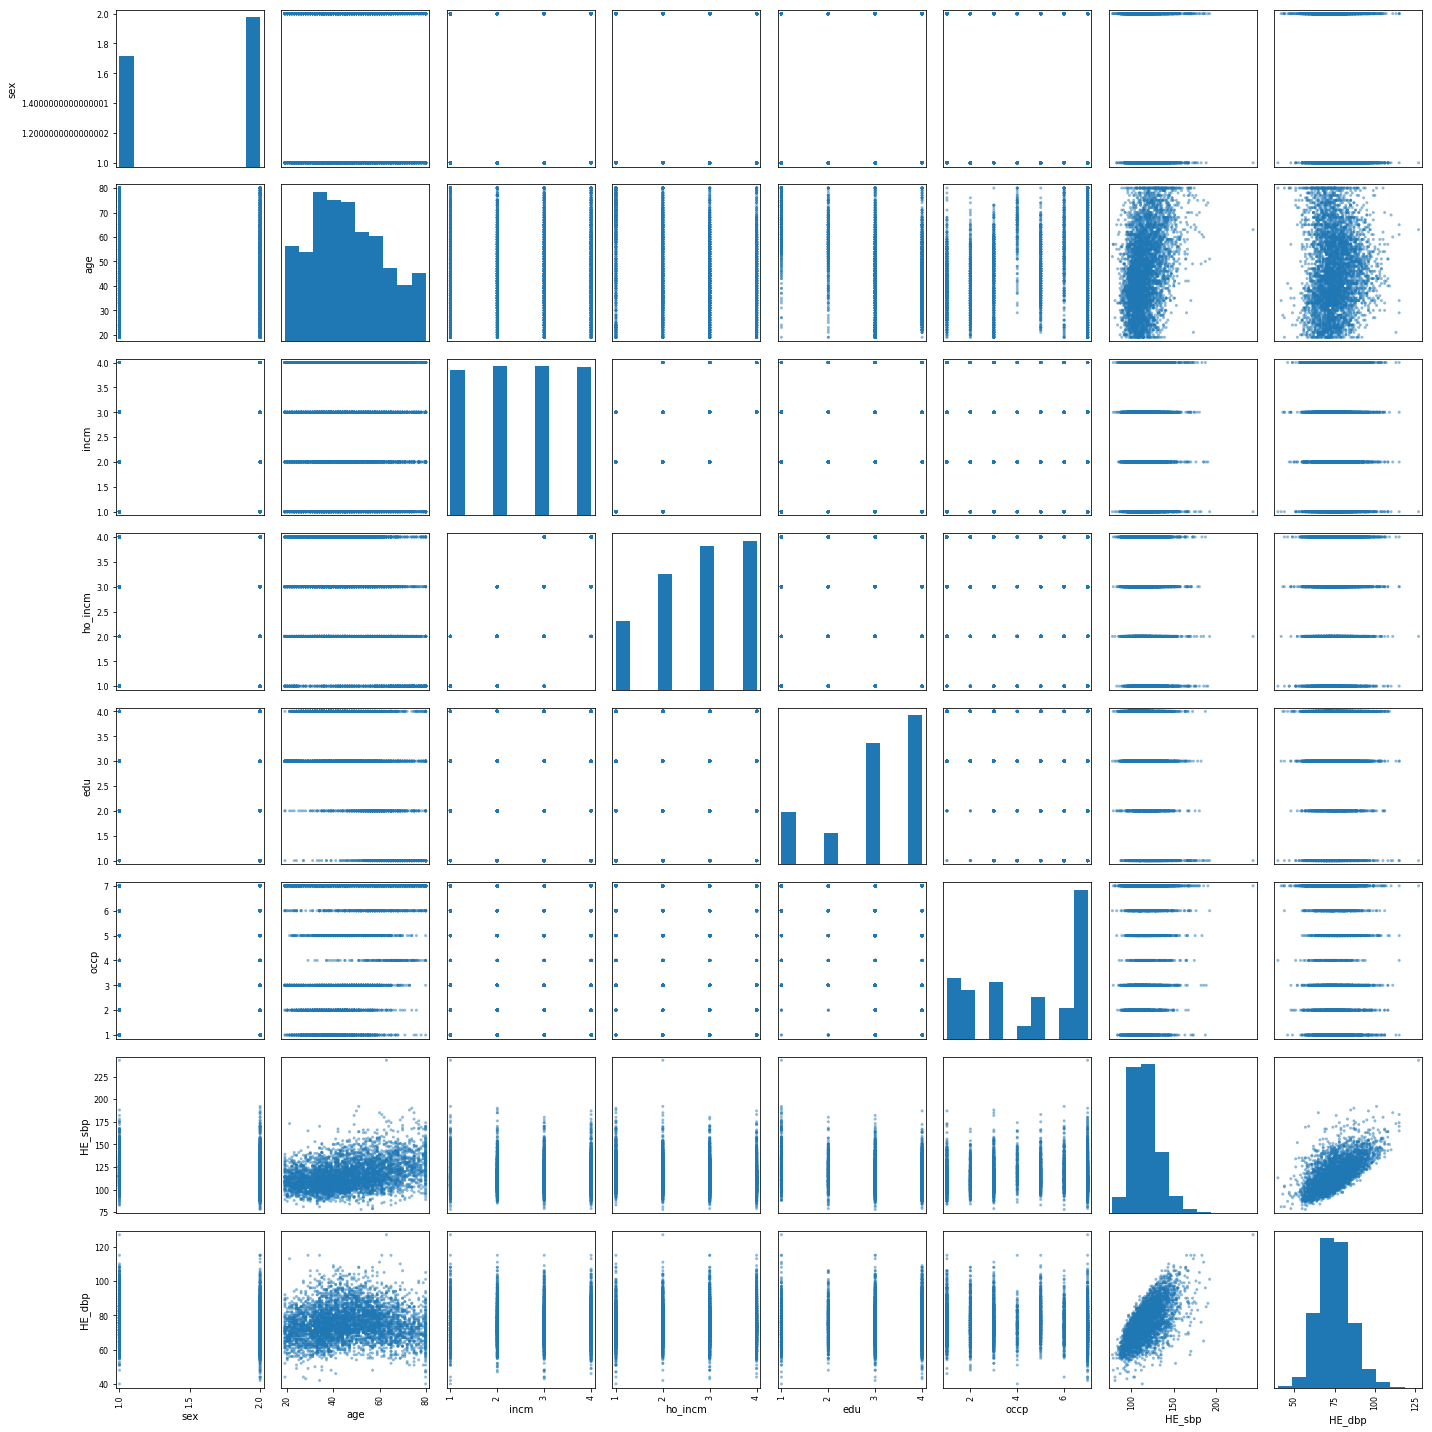

In [43]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list), figsize=[20,20])
plt.tight_layout()
plt.savefig("20181103_base.png")
plt.show()

In [44]:
df_data.corr()

year    region    town_t     apt_t       sex       age  age_month  \
year         NaN       NaN       NaN       NaN       NaN       NaN        NaN   
region       NaN  1.000000  0.362659 -0.016476 -0.003294  0.102203        NaN   
town_t       NaN  0.362659  1.000000 -0.202005  0.007684  0.142093        NaN   
apt_t        NaN -0.016476 -0.202005  1.000000  0.003821 -0.186315        NaN   
sex          NaN -0.003294  0.007684  0.003821  1.000000 -0.003349        NaN   
age          NaN  0.102203  0.142093 -0.186315 -0.003349  1.000000        NaN   
age_month    NaN       NaN       NaN       NaN       NaN       NaN        NaN   
incm         NaN -0.095592 -0.080611  0.190488 -0.002459  0.001100        NaN   
ho_incm      NaN -0.117481 -0.130623  0.269105 -0.019534 -0.282379        NaN   
edu          NaN -0.136149 -0.186637  0.291646 -0.105065 -0.571069        NaN   
occp         NaN  0.027952  0.032782 -0.066839  0.159743  0.247255        NaN   
wt_hs        NaN -0.043449 -0.199266 -0.096020  0.005333 -0.060418        NaN   
wt_itvex     NaN -0.022908 -0.146944  0.017941 -0.239109 -0.359650        NaN   
wt_pft       NaN -0.163106 -0.211435  0.024267 -0.183252 -0.259327        NaN   
wt_hm        NaN -0.145590 -0.210300  0.044106 -0.223167 -0.356233        NaN   
wt_ntr       NaN -0.045805 -0.166296  0.024101 -0.293590 -0.347735        NaN   
wt_tot       NaN -0.150963 -0.221690 -0.018328 -0.332592 -0.380748        NaN   
wt_pfhm      NaN -0.149137 -0.222674  0.033914 -0.149127 -0.258499        NaN   
wt_pfnt      NaN -0.149401 -0.202162  0.025991 -0.245393 -0.275973        NaN   
wt_hmnt      NaN -0.131726 -0.198122  0.061926 -0.308023 -0.357714        NaN   
wt_pfhmnt    NaN -0.156623 -0.217001  0.065385 -0.253079 -0.296043        NaN   
kstrata      NaN  0.490650  0.328910 -0.834242 -0.010326  0.183345        NaN   
cfam         NaN -0.071499 -0.070931  0.220411  0.005936 -0.322532        NaN   
genertn      NaN -0.072690 -0.040840  0.113190  0.052918 -0.229985        NaN   
allownc      NaN -0.070368 -0.034145  0.044226 -0.016751 -0.068559        NaN   
house        NaN  0.012036  0.034744  0.110427 -0.021680  0.098111        NaN   
live_t       NaN -0.106505 -0.153840  0.267789  0.023474 -0.097495        NaN   
ainc_unit1   NaN -0.017159 -0.002023 -0.063118  0.022913  0.088586        NaN   
ainc_1       NaN -0.006176  0.007400 -0.008095 -0.003370 -0.009139        NaN   
ainc         NaN -0.099736 -0.094601  0.271826 -0.009206 -0.234063        NaN   
...          ...       ...       ...       ...       ...       ...        ...   
FQ_CHOCO     NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_ICECM     NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_PEANUT    NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_CHNUT     NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_SOJU      NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_BEER      NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_RWINE     NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_EN        NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_PROT      NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_FAT       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_SFA       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_MUFA      NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_PUFA      NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_N3        NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_N6        NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_CHOL      NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_CHO       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
FQ_TDF       NaN       NaN       NaN       

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(
      data=df_data.corr()
    , annot=True
    , fmt='.2f'
    , linewidth=5
)
plt.show()